# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
import pandas as pd

file_path = 'Advertising.csv'
advertising_data = pd.read_csv(file_path)

advertising_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
missing_values = advertising_data.isnull().sum()

advertising_data_cleaned = advertising_data.dropna()

missing_values_after_cleaning = advertising_data_cleaned.isnull().sum()

missing_values, missing_values_after_cleaning

(Unnamed: 0    0
 TV            0
 radio         0
 newspaper     0
 sales         0
 dtype: int64,
 Unnamed: 0    0
 TV            0
 radio         0
 newspaper     0
 sales         0
 dtype: int64)

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
import numpy as np

advertising_data_cleaned = advertising_data_cleaned.drop(columns=["Unnamed: 0"])

X = advertising_data_cleaned[["TV", "radio", "newspaper"]].values
y = advertising_data_cleaned["sales"].values

X.shape, y.shape

((200, 3), (200,))

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [ ]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [ ]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [4]:
w = np.zeros(X.shape[1])

iterations = 1000

r = y.copy()

for _ in range(iterations):
    for j in range(X.shape[1]):
        r = r + X[:, j] * w[j]
        
        w[j] = np.dot(X[:, j], r) / np.dot(X[:, j], X[:, j])
        
        r = r - X[:, j] * w[j]
        
w


array([0.05379188, 0.22222731, 0.01681639])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [5]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[0.05379188 0.22222731 0.01681639]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [6]:
# Standardizing the columns of X
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

scaled_mean = X_scaled.mean(axis=0)
scaled_std = X_scaled.std(axis=0)

X_scaled[:5], scaled_mean, scaled_std


(array([[ 0.96985227,  0.98152247,  1.77894547],
        [-1.19737623,  1.08280781,  0.66957876],
        [-1.51615499,  1.52846331,  1.78354865],
        [ 0.05204968,  1.21785493,  1.28640506],
        [ 0.3941822 , -0.84161366,  1.28180188]]),
 array([ 1.22124533e-16, -4.52970994e-16,  2.22044605e-16]),
 array([1., 1., 1.]))

**Добавим единичный столбец**

In [ ]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [7]:
X_scaled = np.hstack([np.ones(X_scaled.shape[0]).reshape(-1, 1), X_scaled])

def mse_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [8]:
y_naive_pred = np.mean(y)

mse_naive = mse_error(y, y_naive_pred)

y_naive_pred, mse_naive


(14.0225, 27.085743750000002)

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [ ]:
#ваш код

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [9]:
def stoch_grad_step(X, y, w, train_ind, eta):
    x_i = X[train_ind]
    y_i = y[train_ind]

    y_pred = np.dot(x_i, w)

    gradient = -2 * x_i * (y_i - y_pred)

    w = w - eta * gradient

    return w

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [10]:
def stochastic_gradient_descent(X, y, w_init, eta, max_iter, tol):
    w = w_init.copy()
    errors = []
    iter_count = 0
    distance = float('inf')

    while distance > tol and iter_count < max_iter:
        train_ind = np.random.randint(0, X.shape[0])
        
        y_pred = np.dot(X, w)
        mse = mse_error(y, y_pred)
        errors.append(mse)
        
        w_old = w.copy()
        
        w = stoch_grad_step(X, y, w, train_ind, eta)
        
        distance = np.linalg.norm(w - w_old)
        
        iter_count += 1

    return w, errors


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

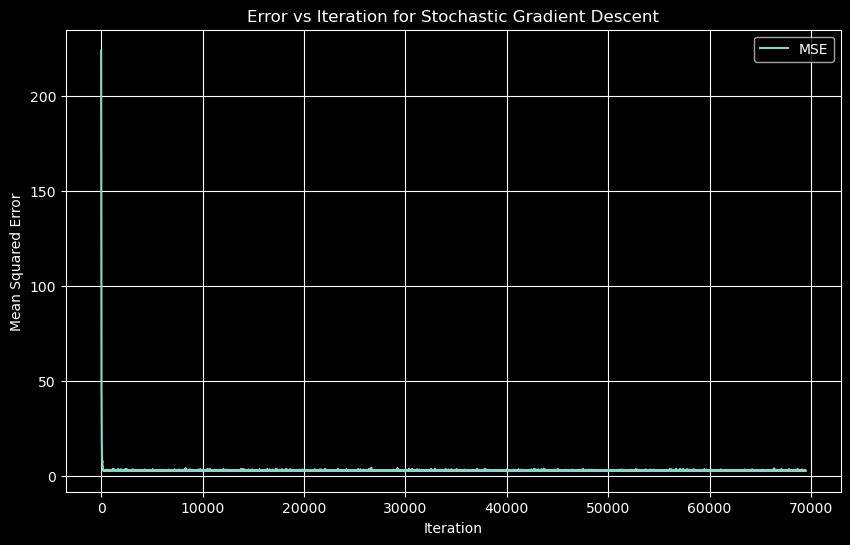

In [12]:
import matplotlib.pyplot as plt

w_initial = np.zeros(X_scaled.shape[1]) 
eta = 0.01
max_iter = 100_000
tol = 1e-6

w_final, errors = stochastic_gradient_descent(X_scaled, y, w_initial, eta, max_iter, tol)

plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, label="MSE")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Error vs Iteration for Stochastic Gradient Descent")
plt.grid()
plt.legend()
plt.show()


**Выведите вектор весов, к которому сошелся метод.**

In [13]:
w_final

array([14.28502259,  3.97797226,  2.89333668, -0.09622022])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [14]:
errors[-1]  # MSE from the last iteration

2.867054622075691